<a href="https://colab.research.google.com/github/shihanrehman/DBRS_InterviewChallenge_2/blob/master/Final_NYC_Boroughs_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start (Load the CSV File)<br>

load libraries and download *.csv

In [102]:
#import libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
!pip3 install pygeocoder
from pygeocoder import Geocoder

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [103]:
print ('Pandas version is:', pd.__version__) 

Pandas version is: 0.22.0


Let's download ZipCode_Population.csv & Complaints_2017data.rar, rename and unrar it.

In [104]:
current_dir_files = os.listdir('.')
print (current_dir_files)

['.config', '10_most_overall_Complaint types_for_Borough_2017.csv', '311_Service_Requests_from_2010_to_Present.csv', 'Lat_Longit.csv', 'ZipCode_Population.csv', 'Lat_Long.csv', 'Complaints_2017data.rar', 'sample_data']


In [0]:
if '311_Service_Requests_from_2010_to_Present.csv' not in current_dir_files:
  
  !wget –q 'https://www.dropbox.com/s/ipa7s8gxx5vuoi3/Complaints_2017data.rar?dl=1'
  os.rename ('Complaints_2017data.rar?dl=1', 'Complaints_2017data.rar')
  !unrar e -inul -y 'Complaints_2017data.rar'

In [0]:
if 'ZipCode_Population.csv' not in current_dir_files:
  
  !wget -q 'https://www.dropbox.com/s/10lcdkz0u3y0ppy/ZipCode_Population.csv?dl=1'
  os.rename ('ZipCode_Population.csv?dl=1', 'ZipCode_Population.csv')

In [107]:
# Lets look at the data and analyze it.  

data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header = 0, nrows=10)
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37188206,09/14/2017 04:40:33 PM,10/19/2018 07:30:48 AM,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11374,63-11 WETHEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.728620,-73.865295,"(40.728619539832, -73.865295234063)"
1,35735866,03/18/2017 10:09:57 AM,10/19/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Curb Cut/Driveway/Carport - Illegal,NaN,11420,111-36 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680213,-73.821227,"(40.680213167851, -73.821227012238)"


In [108]:
print ('Columns: ', data.columns.values)

Columns:  ['Unique Key' 'Created Date' 'Closed Date' 'Agency' 'Agency Name'
 'Complaint Type' 'Descriptor' 'Location Type' 'Incident Zip'
 'Incident Address' 'Street Name' 'Cross Street 1' 'Cross Street 2'
 'Intersection Street 1' 'Intersection Street 2' 'Address Type' 'City'
 'Landmark' 'Facility Type' 'Status' 'Due Date' 'Resolution Description'
 'Resolution Action Updated Date' 'Community Board' 'BBL' 'Borough'
 'X Coordinate (State Plane)' 'Y Coordinate (State Plane)'
 'Open Data Channel Type' 'Park Facility Name' 'Park Borough'
 'Vehicle Type' 'Taxi Company Borough' 'Taxi Pick Up Location'
 'Bridge Highway Name' 'Bridge Highway Direction' 'Road Ramp'
 'Bridge Highway Segment' 'Latitude' 'Longitude' 'Location']


###Part A - Validate and clean the data, and ensure that it is from 2017

[link text](https://)


Create a script that grabs data from the CSV using the Pandas library. 

In [0]:
col_names = ['Complaint Type', 'Borough', 'Created Date', 'Incident Zip', 'Latitude', 'Longitude']
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header = 0, usecols = col_names)
data #display the first 2 rows

In [0]:
#to clean up the unspecified boroughs, create a mapping of lookup values.  
mapping = (data.query('Borough != "Unspecified"')
             .drop_duplicates('Incident Zip')
             .set_index('Incident Zip')
             .Borough)
mapping

In [0]:
data['Borough'] = data['Incident Zip'].map(mapping).fillna('Unspecified')
data.head(80)

In [0]:
data_unspecified = data[data['Borough'] == 'Unspecified']
data_unspecified
#There are not 996 Unspecified records belonging to boroughs

In [0]:
#if you do want to reverse geocode Latiutude and Longitude into Zipcodes, use the following code below, however, you need an API key and there are costs incurred with this.  
#results = Geocoder.reverse_geocode(data_unspecified['Latitude'].iloc[0], data_unspecified['Longitude'].iloc[0])

In [114]:
print ("data DataFrame's shape is: ", data.shape)

data DataFrame's shape is:  (2461176, 6)


In [115]:
# Unique values in 'Borough' column

data.Borough.unique()

array(['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [116]:
# Let's look at column 'Created Date'

print (data['Created Date'].min())
print (np.sort(data['Created Date'].unique())[:2])

01/01/2017 01:00:17 AM
['01/01/2017 01:00:17 AM' '01/01/2017 01:00:26 AM']


minimal data & time in column 'Created Date' is the beginning of 2017 year<br>
it satisfies the condition: Created Date (Should all be from 2017)

In [117]:
print (data['Created Date'].max())


12/31/2017 12:59:35 PM


###Part B - Find the 10 most common overall “Complaint types” for the year 2017 

In [118]:
data['Complaint Type'].value_counts()[:10]

Noise - Residential        230152
HEAT/HOT WATER             213521
Illegal Parking            146122
Blocked Driveway           136097
Street Condition            93265
Street Light Condition      84195
UNSANITARY CONDITION        79282
Noise - Street/Sidewalk     73085
Water System                65100
Noise                       60171
Name: Complaint Type, dtype: int64

###Part C - How many of each of those 10 types were there in 2017, for each borough?

In [119]:
# How many of each of those 10 types were there in 2017, for each borough?

com_top_10 = data['Complaint Type'].value_counts()[:10].index
temp_df = data[data['Complaint Type'].isin(com_top_10)].groupby(['Borough'])['Complaint Type'].value_counts()
temp_df

Borough        Complaint Type         
BRONX          HEAT/HOT WATER             69085
               Noise - Residential        57928
               UNSANITARY CONDITION       24730
               Blocked Driveway           24632
               Illegal Parking            16244
               Noise - Street/Sidewalk    14109
               Street Condition           11181
               Water System                9996
               Street Light Condition      8421
               Noise                       3057
BROOKLYN       Noise - Residential        67677
               HEAT/HOT WATER             66977
               Illegal Parking            55478
               Blocked Driveway           49390
               UNSANITARY CONDITION       26654
               Street Condition           24890
               Noise - Street/Sidewalk    21321
               Water System               19512
               Noise                      15235
               Street Light Condition     14558
M

In [120]:
# How many of each of those 10 types were there in 2017, for each borough?
# The same data in another, more visual view

temp_df.unstack().fillna(0)

Complaint Type,Blocked Driveway,HEAT/HOT WATER,Illegal Parking,Noise,Noise - Residential,Noise - Street/Sidewalk,Street Condition,Street Light Condition,UNSANITARY CONDITION,Water System
Borough,,,,,,,,,,
BRONX,24632.0,69085.0,16244.0,3057.0,57928.0,14109.0,11181.0,8421.0,24730.0,9996.0
BROOKLYN,49390.0,66977.0,55478.0,15235.0,67677.0,21321.0,24890.0,14558.0,26654.0,19512.0
MANHATTAN,3390.0,46156.0,19626.0,28753.0,50814.0,29076.0,14471.0,2044.0,14458.0,10646.0
QUEENS,54891.0,29230.0,46714.0,11220.0,46695.0,7712.0,32372.0,52506.0,11489.0,19674.0
STATEN ISLAND,3794.0,2073.0,8060.0,1906.0,7037.0,867.0,10351.0,6666.0,1951.0,5272.0
Unspecified,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Output a generated CSV with the result to file '10_most_overall_Complaint types_for_Borough_2017.csv'

temp_df.to_csv('10_most_overall_Complaint types_for_Borough_2017.csv', header = True)

###Part D - Find the 10 most populous zip codes that belong to boroughs of NYC from the US census data<br>
The '2017 US Census Population'’ has zip codes with their corresponding population counts for all zip codes in the US; however, we need to extract the zip codes and respective populations that have matching zip code values in the  "2017 Complaints " CSV files.  One the zipcode values are matched up, take the greatest 10 as the 10 most populous zipcodes.  

In [122]:
# Read ZipCode_Population.csv to Pandas DataFrame zip_code_poplations

zip_code_population = pd.read_csv('ZipCode_Population.csv', header = 0)
zip_code_population.rename(columns = {'Zip Code ZCTA':'zip_code'}, inplace=True)
zip_code_population.head()

,zip_code,2017 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [123]:
# Extract the list of all unique zip codes in the “Incident_zip” field

all_unique_zip_codes = data['Incident Zip'].unique()
all_unique_zip_codes[:20] #filter to 20 results

array([11374.0, 11420.0, 11230.0, 10028.0, 10467.0, 10003.0, 11385.0,
       11418.0, 10458.0, 11423.0, 11105.0, 10457.0, 11226.0, 10034.0,
       10466.0, 11220.0, 11360.0, 10029.0, 11212.0, 11209.0], dtype=object)

In [124]:
print ('number of all unique zip codes in the "Incident_zip" is: ', len(all_unique_zip_codes))

number of all unique zip codes in the "Incident_zip" is:  909


In [125]:
# and match them up with the values from the ‘ZipCode_Population’.

zip_code_population[zip_code_population.zip_code.isin(all_unique_zip_codes)].shape[0]

230

**! DataFrame 'zip_code_populations' contains only 216 zip-codes from 265 in DataFrame 'data' with Complaints**<br>
we have to redefine the 10 most popular zip codes with this in mind 

In [126]:
temp_df = zip_code_population[zip_code_population.zip_code.isin(all_unique_zip_codes)]
temp_df.sort_values('2017 Census Population', ascending=False)[:10]
#The 10 most populous zip codes are outputted below 

,zip_code,2017 Census Population
2748,11368,109931
2720,11226,101572
2753,11373,100820
2714,11220,99598
2759,11385,98592
2527,10467,97060
2451,10025,94600
2702,11208,94469
2729,11236,93877
2701,11207,93386


In [127]:
# Let's make sure everything is done right and  look at the number of unique zip codes

temp_df.zip_code.nunique()

230

In [0]:
# Let's make array with 10 most populous zip codes

ten_most_populous_zip_codes = temp_df.sort_values('2017 Census Population', ascending=False)[:10]['zip_code'].values

###<b>Part E -  Consider only the 10 most common overall complaint types for the 10 most populous zip codes found in Part D, how many of each of those 10  complaint types were there in 2017 for each of the 10 most populous zip codes.?<br>

In [129]:
print ('10 most populous zip codes in our data DataFrame with complaints: \n', ten_most_populous_zip_codes )

10 most populous zip codes in our data DataFrame with complaints: 
 [11368 11226 11373 11220 11385 10467 10025 11208 11236 11207]


In [0]:
temp_df = data[(data['Complaint Type'].isin(com_top_10)) & (data['Incident Zip'].isin(ten_most_populous_zip_codes))]

In [131]:
temp_df.head()

,Created Date,Complaint Type,Incident Zip,Borough,Latitude,Longitude
294,10/09/2017 08:09:00 PM,Street Light Condition,11385,QUEENS,40.705772,-73.899963
371,11/06/2017 05:33:00 PM,Noise,11385,QUEENS,40.709026,-73.864191
421,12/08/2017 09:54:00 AM,Street Light Condition,11368,QUEENS,40.750671,-73.863096
458,12/30/2017 04:54:00 AM,Street Light Condition,11207,BROOKLYN,40.655833,-73.887535
574,10/30/2017 08:47:48 PM,UNSANITARY CONDITION,11373,QUEENS,40.745986,-73.872673


In [0]:
# These are our values, which should = to a 100.  

temp_df = temp_df.groupby(['Incident Zip'])['Complaint Type'].value_counts().unstack()

In [133]:
temp_df

Complaint Type,Blocked Driveway,HEAT/HOT WATER,Illegal Parking,Noise,Noise - Residential,Noise - Street/Sidewalk,Street Condition,Street Light Condition,UNSANITARY CONDITION,Water System
Incident Zip,,,,,,,,,,
10025.0,124,2396,728,1337,2079,1215,613,21,710,470
10467.0,2068,6037,985,282,5807,713,605,400,2168,554
11207.0,2058,2461,1495,199,3052,554,1127,897,1603,750
11208.0,2756,2051,2145,179,2788,821,804,551,1334,699
11220.0,1558,1632,2011,441,1521,498,677,593,708,671
11226.0,2203,7569,1072,431,4852,1831,481,193,3125,405
11236.0,3041,1143,1429,107,1928,201,1006,172,553,610
11368.0,4382,1619,1251,156,2460,684,553,421,632,607
11373.0,2635,3408,1277,266,1842,304,685,349,749,366


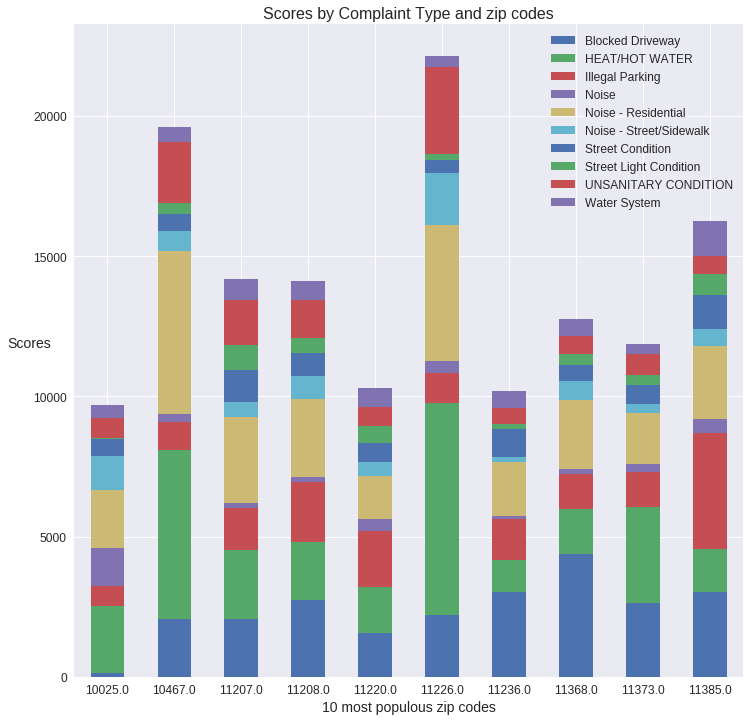

In [134]:
temp_df[temp_df.columns].plot.bar(stacked=True, figsize = [12, 12])
plt.title('Scores by Complaint Type and zip codes', fontsize=16)
plt.xlabel('10 most populous zip codes', rotation=0, fontsize=14)
plt.ylabel('Scores', rotation=0, fontsize=14)
plt.xticks( rotation=0, fontsize=12)
plt.yticks( rotation=0, fontsize=12)
plt.legend(fontsize=12, loc = 1)
plt.show()

###Part F - Considering all complaint types. Which boroughs are the biggest "complainers" relative to the size of the population in 2017? Meaning, calculate a complaint-index that adjusts for population of the borough.

In [135]:
data.head()

,Created Date,Complaint Type,Incident Zip,Borough,Latitude,Longitude
0,09/14/2017 04:40:33 PM,New Tree Request,11374,QUEENS,40.728620,-73.865295
1,03/18/2017 10:09:57 AM,General Construction/Plumbing,11420,QUEENS,40.680213,-73.821227
2,03/29/2017 12:38:28 PM,General Construction/Plumbing,11230,BROOKLYN,40.621648,-73.961658
3,06/05/2017 12:47:55 PM,New Tree Request,10028,MANHATTAN,40.772523,-73.949018
4,06/15/2017 11:56:36 AM,Dead/Dying Tree,10467,BRONX,40.875447,-73.876262


In [136]:
# From the data DataFrame calculate the total number of complaints by borough

total_complaints_df = data['Borough'].value_counts().to_frame()
total_complaints_df.rename(columns={'Borough':'Total_complaints_number'}, inplace= True)
total_complaints_df.head()

,Total_complaints_number
BROOKLYN,746845
QUEENS,689738
MANHATTAN,460761
BRONX,434976
STATEN ISLAND,127860


In [137]:
# Lets calculate the quantity of Borough's populations

temp_df = data[['Incident Zip','Borough']]
temp_df.rename(columns = {'Incident Zip' : 'zip_code'}, inplace=True)
temp_df.drop_duplicates(['zip_code'], inplace = True)

display(temp_df.head())
print ("\nDataFrame's temp_df shape is ", temp_df.shape)
print ("Number unique zip code in temp_df DataFrame is ", temp_df.zip_code.nunique())

,zip_code,Borough
0,11374,QUEENS
1,11420,QUEENS
2,11230,BROOKLYN
3,10028,MANHATTAN
4,10467,BRONX



DataFrame's temp_df shape is  (909, 2)
Number unique zip code in temp_df DataFrame is  908


In [138]:
zip_code_population.head(2)

,zip_code,2017 Census Population
0,1001,16769
1,1002,29049


In [139]:
temp_df = pd.merge(temp_df, zip_code_population, how = 'left', on= 'zip_code' )
temp_df['2017 Census Population'].fillna(0, inplace=True)
temp_df.head()

,zip_code,Borough,2017 Census Population
0,11374,QUEENS,43600.0
1,11420,QUEENS,44354.0
2,11230,BROOKLYN,86408.0
3,10028,MANHATTAN,45141.0
4,10467,BRONX,97060.0


In [140]:
# Final dataset with quantity populations of Boroughs

borough_population_df = temp_df[['Borough', '2017 Census Population']].groupby('Borough')['2017 Census Population'].sum().to_frame()
borough_population_df.head()

,2017 Census Population
Borough,
BRONX,1394915.0
BROOKLYN,2504700.0
MANHATTAN,1577376.0
QUEENS,2311269.0
STATEN ISLAND,468730.0


In [141]:
# Let's merge two DataFrames

complaint_index_df = pd.merge(borough_population_df, total_complaints_df, how = 'left', left_index=True, right_index=True)
complaint_index_df['2017 Census Population'] = complaint_index_df['2017 Census Population'].astype('int')
complaint_index_df.head()

,2017 Census Population,Total_complaints_number
Borough,,
BRONX,1394915,434976
BROOKLYN,2504700,746845
MANHATTAN,1577376,460761
QUEENS,2311269,689738
STATEN ISLAND,468730,127860


In [142]:
# And calculate complaint ratio to the size of the population of each borough 

complaint_index_df['ratio']= complaint_index_df['Total_complaints_number']/complaint_index_df['2017 Census Population']
complaint_index_df.sort_values('ratio', ascending=False).head()

,2017 Census Population,Total_complaints_number,ratio
Borough,,,
BRONX,1394915,434976,0.311830
QUEENS,2311269,689738,0.298424
BROOKLYN,2504700,746845,0.298177
MANHATTAN,1577376,460761,0.292106
STATEN ISLAND,468730,127860,0.272780


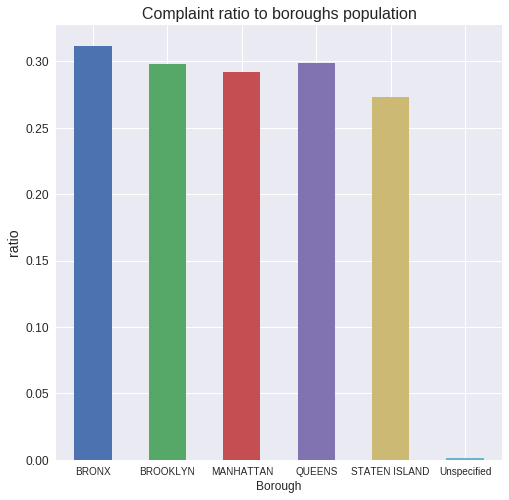

In [144]:
complaint_index_df['ratio'].plot.bar(figsize = [8, 8])
plt.title('Complaint ratio to boroughs population', fontsize=16)
plt.xlabel('Borough', rotation=0, fontsize=12)
plt.ylabel('ratio', rotation=90, fontsize=14)
plt.xticks( rotation=0, fontsize=10)
plt.yticks( rotation=0, fontsize=12)
plt.show()